In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dfx=pd.read_csv('/jupyter/Logistic_X_Train.csv')
dfy=pd.read_csv('/jupyter/Logistic_Y_Train.csv')
df_test=pd.read_csv('/jupyter/Logistic_X_Test.csv')

In [18]:
x_train=dfx[['f1','f2','f3']]
x_train=x_train.values
y_train=dfy.values.reshape((-1,))
print(x_train.shape,y_train.shape)

(3000, 3) (3000,)


In [19]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [20]:
def sigmoid(x):
     return 1.0/(1.0+np.exp(-1.0*x))

In [21]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
        return err/x.shape[0]

In [22]:
def gradient(x,y,w,b):
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
        return [grad_w/x.shape[0],grad_b/x.shape[0]]

In [46]:
def gradientAscent(x,y,lrate=1):
        err_list=[]
        w=np.random.random((x.shape[1],))
    
        b=np.random.random()
        itr=0
        max_itr=100
        while(itr<=max_itr):
            [grad_w,grad_b]=gradient(x,y,w,b)
            e=error(x,y,w,b)
            w+=lrate*grad_w
            b+=lrate*grad_b
            err_list.append(e)
            itr+=1
        return w,b,err_list

In [52]:
def predict(x,w,b):    
        y_pred = []
        for i in range(x.shape[0]):
            confidence=hypothesis(x[i],w,b)
            if confidence<0.5:
                p=0
            else:
                p=1
            y_pred.append(p)
        y_pred = np.array(y_pred)
        return y_pred

In [53]:
w,b,err_list=gradientAscent(x_train,y_train)

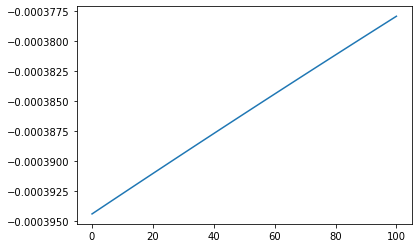

In [54]:
plt.plot(err_list)


In [55]:
df_test=pd.read_csv('/jupyter/Logistic_X_Test.csv')
df_test=df_test[['f1','f2','f3']].values
y_prediction=predict(df_test,w,b)

In [56]:
print(y_prediction)

[0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 